In [87]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16})

<Figure size 640x480 with 0 Axes>

# waveforms

In [88]:
!ls /Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022

metadata.csv strains.npy  times.npy


In [89]:

import numpy as np
import pandas as pd
import os

from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.optimize import curve_fit

In [90]:
datadir = "/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"

In [91]:
metadata = pd.read_csv(os.path.join(datadir, 'metadata.csv'))
strains = np.load(os.path.join(datadir, 'strains.npy'))
times = np.load(os.path.join(datadir, 'times.npy'))

In [92]:
strains.shape

(55, 8620)

In [93]:
metadata

name      q     fring     fdamp  duration  t_final
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2
40     RIT-BBH-0957-n084  15.00  0.064066  0.014135    1038.4    363.1
41                GT0379   2.20  0.081956  0.013812     936.3    616.9
42                GT0378   2.05  0.082845  0.013784     915.7    637.3
43                GT0757   2.25  0.081668  0.013820    1429.1    420.0
44                GT0380   2.35  0.081105  0.013837     957.9    595.3
45                GT0454   4.00  0.074330  0.014004    1855.1    495.1
46                GT0898   1.20  0.087693  0.013611    1793.9    286.8
47                GT0446   2.00  0.083149  0.013774    1378.6    470.3
48                GT0453   3.00  0.077907  0.013924    1599.7    549.9
49                GT0727   1.75  0.084699  0.013722    1330.0    418.7
50                GT0477   1.50  0.086221  0.013667    1286.6    361.9
51                GT0738   1.25  0.087500  0.013619    1252.6    395.9
52                GT0577   5.00  0.071862  0.014048    1281.6    574.2
53                GT0565   2.50  0.080296  0.013861    1484.2    465.0
54                GT0604   6.00  0.070079  0.014075    1496.1    460.8

In [94]:
idx = 22
# idx = 54
# idx = 33
# idx = 34
metadata.loc[[idx]]

name    q     fring     fdamp  duration  t_final
22  SXS_BBH_0180_Res4  1.0  0.088087  0.013596    9270.5    236.4

In [95]:
f_ring = metadata.loc[idx]['fring']
f_damp = metadata.loc[idx]['fdamp']

In [96]:
strain = strains[idx]

In [97]:
# mask = (times > -50) & (times < 50)
# mask = (times > -100) & (times < 50)
# mask = (times > -100) & (times < 100)
# mask = (times > -100) & (times < 100)
mask = (times > -400) & (times < 100)
# mask = (times > -800) & (times < 100)
times = times[mask]
strain = strain[mask]

In [98]:
def take_deriv(t, y, n=1):
    if y.dtype in ['complex128']:
        y_re = IUS(t, y.real).derivative(n)(t)
        y_im = IUS(t, y.imag).derivative(n)(t)
        return y_re - 1.j*y_im
    else:
        return IUS(t, y).derivative(n)(t)

In [99]:
d_strain = take_deriv(times, strain)
dd_strain = take_deriv(times, strain, 2)
ddd_strain = take_deriv(times, strain, 3)

In [100]:
def func(x, a, b, x0):
    return a * 1/np.cosh(b*(x - x0))

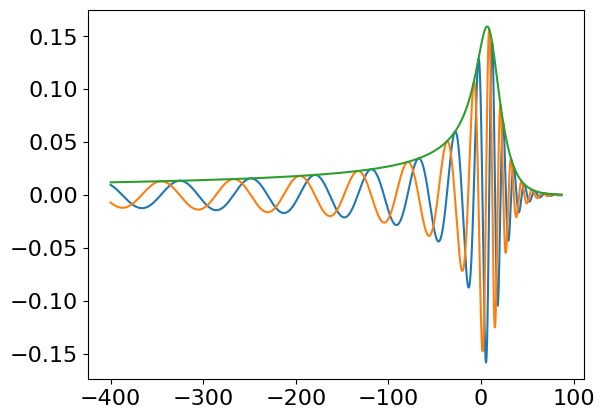

In [101]:
plt.plot(times, d_strain.real)
plt.plot(times, d_strain.imag)
plt.plot(times, np.abs(d_strain))

In [102]:
popt, pcov = curve_fit(func, times, np.abs(dd_strain))

In [103]:
popt

array([ 0.07064189, -0.0808838 ,  9.02534879])

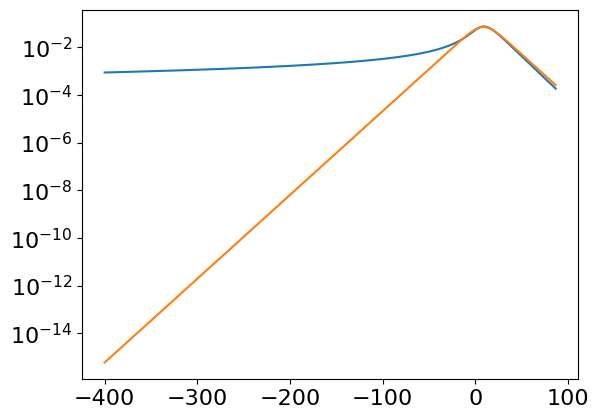

In [104]:
# plt.plot(times, dd_strain.real)
# plt.plot(times, dd_strain.imag)
plt.plot(times, np.abs(dd_strain))

plt.plot(times, func(times, *popt))

plt.yscale('log')

In [105]:
popt, pcov = curve_fit(func, times, np.abs(ddd_strain))

In [106]:
popt

array([ 0.03611117, -0.0962494 , 12.03494783])

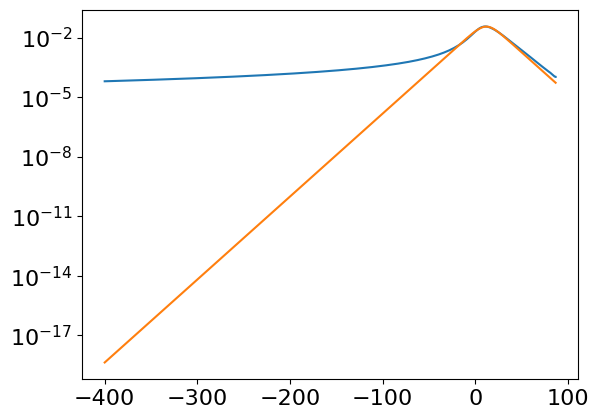

In [107]:
# plt.plot(times, ddd_strain.real)
# plt.plot(times, ddd_strain.imag)
plt.plot(times, np.abs(ddd_strain))

plt.plot(times, func(times, *popt))

plt.yscale('log')

In [108]:
amp = np.abs(strain)
phase = np.unwrap(np.angle(strain))
freq = take_deriv(times, phase)
d_freq = take_deriv(times, phase, 2)
dd_freq = take_deriv(times, phase, 3)

d_amp = take_deriv(times, amp)
dd_amp = take_deriv(times, amp, 2)
ddd_amp = take_deriv(times, amp, 3)

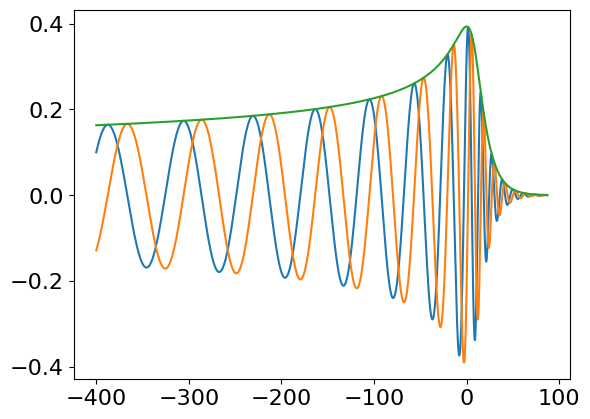

In [109]:
plt.plot(times, strain.real)
plt.plot(times, strain.imag)
plt.plot(times, amp)

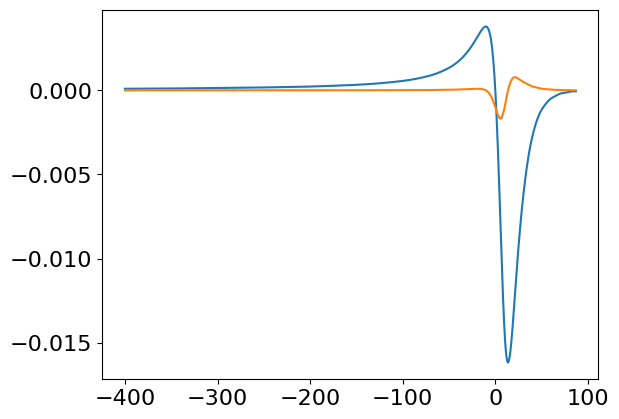

In [110]:
plt.plot(times, d_amp)
plt.plot(times, dd_amp)

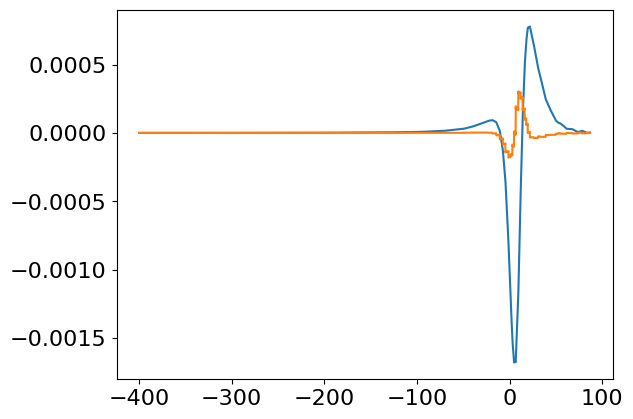

In [111]:
plt.plot(times, dd_amp)
plt.plot(times, ddd_amp)

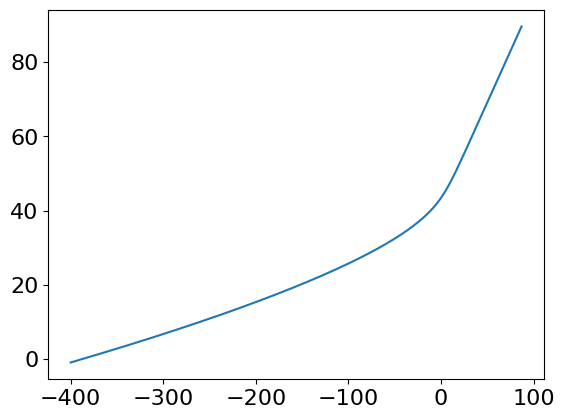

In [112]:
plt.plot(times, phase)

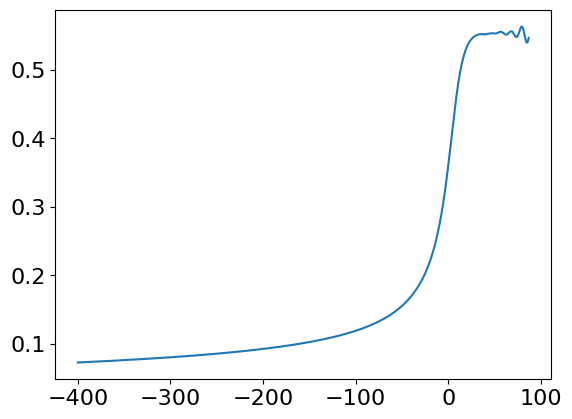

In [113]:
plt.plot(times, freq)

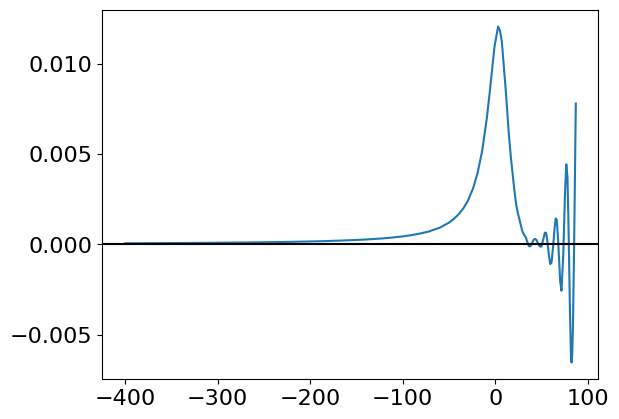

In [114]:
plt.plot(times, d_freq)
plt.axhline(0, c='k')

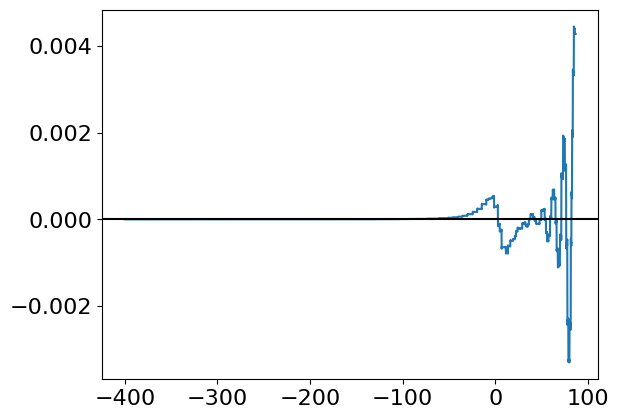

In [115]:
plt.plot(times, dd_freq)
plt.axhline(0, c='k')

# lmfit

In [116]:
import pandas as pd
import lmfit.models

In [181]:
# df = pd.DataFrame({'x':times, 'y':d_freq})
# df = pd.DataFrame({'x':times, 'y':amp})
# df = pd.DataFrame({'x':times, 'y':np.abs(d_strain)})
df = pd.DataFrame({'x':times, 'y':np.abs(dd_strain)})

<Axes: xlabel='x'>

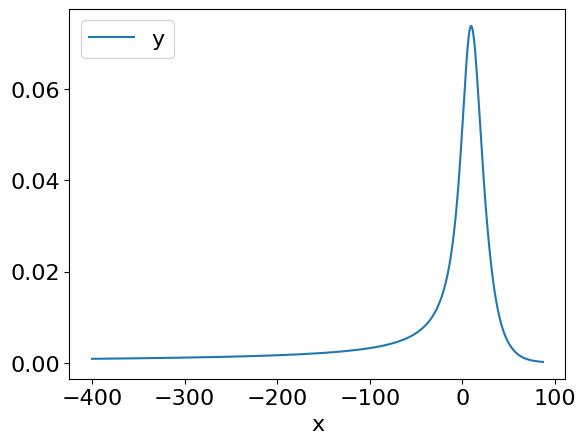

In [182]:
df.set_index('x').plot()

In [195]:
# model = lmfit.models.LorentzianModel()
# model = lmfit.models.SplitLorentzianModel()
# model = lmfit.models.PseudoVoigtModel()
# model = lmfit.models.VoigtModel()
# model = lmfit.models.GaussianModel()
# model = lmfit.models.MoffatModel()
# model = lmfit.models.Pearson4Model()
# model = lmfit.models.Pearson7Model()
# model = lmfit.models.StudentsTModel()

# params = model.guess(df['y'], x=df['x'])

# composite

model_p = lmfit.models.Pearson4Model()
model_pol = lmfit.models.LinearModel(prefix='lin_')

model = model_p * model_pol 



params_p = model_p.guess(df['y'], x=df['x'])
# params_p = model_p.make_params(sigma={'value':11.70642, 'vary':False}, expon={'value':0.5534661793, 'vary':False})
params_pol = model_pol.make_params()
params = params_p + params_pol


# params['sigma'].vary = False
# params['sigma'].value = 11.70642

# params['expon'].vary = False
# params['expon'].value = 0.5534661793




In [196]:
params

Parameters([('amplitude', <Parameter 'amplitude', value=3.215999596976207, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=9.450000000178363, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=14.550000000003308, bounds=[0.0:inf]>), ('expon', <Parameter 'expon', value=1.5, bounds=[0.500000000000001:1000]>), ('skew', <Parameter 'skew', value=0.0, bounds=[-1000:1000]>), ('fwhm', <Parameter 'fwhm', value=22.302849253344675, bounds=[-inf:inf], expr='sigma*sqrt(2**(1/expon)-1)*pi/arctan2(exp(1)*expon, skew)'>), ('height', <Parameter 'height', value=0.11051545006788545, bounds=[-inf:inf], expr='(amplitude / sigma) * exp(2 * (real(loggammafcn(expon + skew * 0.5j)) - loggammafcn(expon)) - betalnfnc(expon-0.5, 0.5) - expon * log1p(square(skew/(2*expon))) - skew * arctan(-skew/(2*expon)))'>), ('position', <Parameter 'position', value=9.450000000178363, bounds=[-inf:inf], expr='center-sigma*skew/(2*expon)'>), ('lin_slope', <Parameter 'lin_slope', value=1.0, bounds=[-inf:inf]>), ('lin_intercept', <Parameter 'lin_intercept', value=0.0, bounds=[-inf:inf]>)])

In [197]:
result = model.fit(df['y'], params, x=df['x'])

In [198]:
print(result.fit_report())

[[Model]]
    (Model(pearson4) * Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 98
    # data points      = 4870
    # variables        = 7
    chi-square         = 5.2802e-04
    reduced chi-square = 1.0858e-07
    Akaike info crit   = -78087.2748
    Bayesian info crit = -78041.8389
    R-squared          = 0.99947747
[[Variables]]
    amplitude:      2.37492519 +/- 50499847.1 (2126376333.00%) (init = 3.216)
    center:         8.92561471 +/- 0.02332826 (0.26%) (init = 9.45)
    sigma:          13.6595839 +/- 0.01822002 (0.13%) (init = 14.55)
    expon:          0.89229129 +/- 0.00115283 (0.13%) (init = 1.5)
    skew:          -0.31549925 +/- 0.00238007 (0.75%) (init = 0)
    fwhm:           27.3548926 +/- 0.02173021 (0.08%) == 'sigma*sqrt(2**(1/expon)-1)*pi/arctan2(exp(1)*expon, skew)'
    height:         0.04566433 +/- 970995.610 (2126376332.19%) == '(amplitude / sigma) * exp(2 * (real(loggammafcn(expon + skew * 0.5j)) - l

In [199]:
f_ring

0.0880868782728524

In [200]:
f_damp

0.0135955234118141

In [201]:
1/f_damp / 2 / np.pi

11.706422641558213

In [202]:
1/f_ring/2/np.pi

1.8067951346726916

In [203]:
f_ring*2

0.1761737565457048

In [204]:
f_ring*2*np.pi

0.553466179319303

<Axes: title={'center': "(Model(pearson4) * Model(linear, prefix='lin_'))"}, xlabel='x', ylabel='y'>

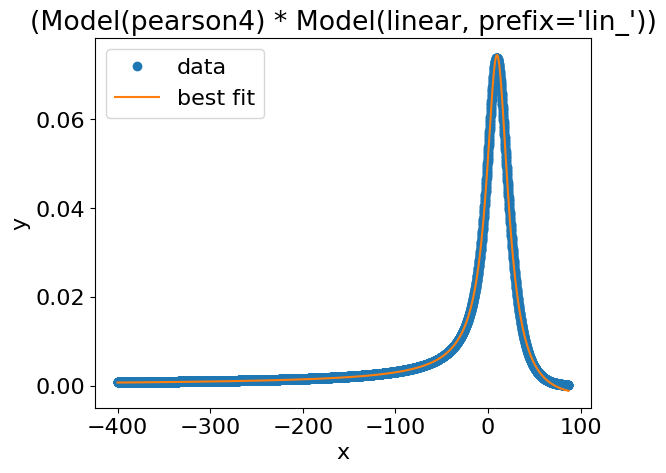

In [207]:
result.plot_fit()
# plt.xlim(-20, 20)

(-20.0, 20.0)

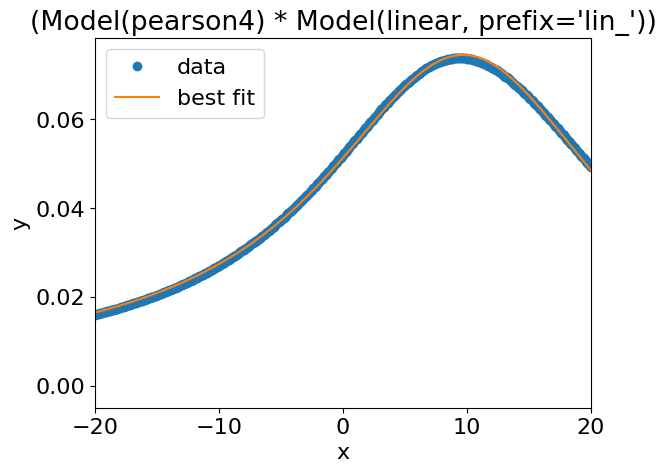

In [206]:
result.plot_fit()
plt.xlim(-20, 20)

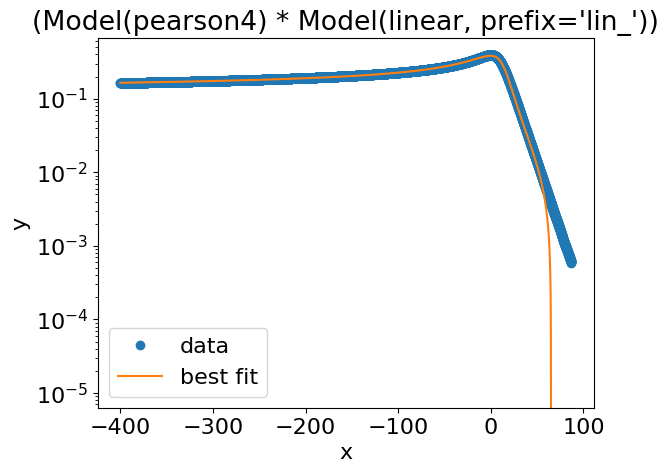

In [152]:
result.plot_fit()
plt.yscale('log')

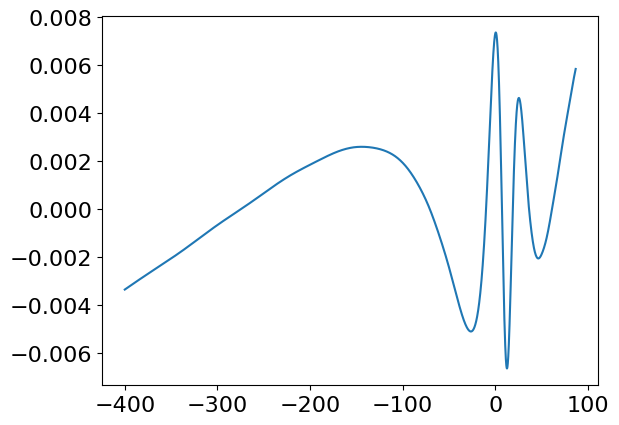

In [38]:
plt.plot(df['x'], df['y']-model.eval(result.params, x=df['x']))


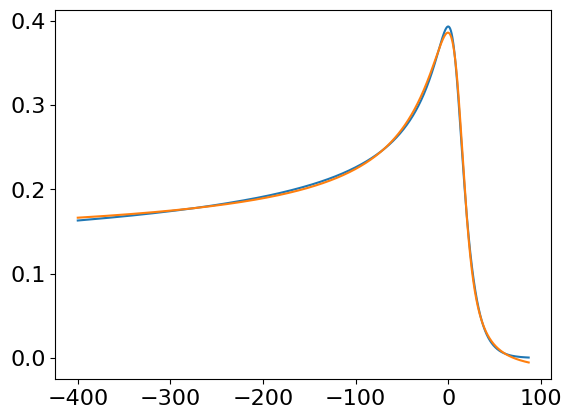

In [39]:
plt.plot(df['x'], df['y'])
plt.plot(df['x'], model.eval(result.params, x=df['x']))


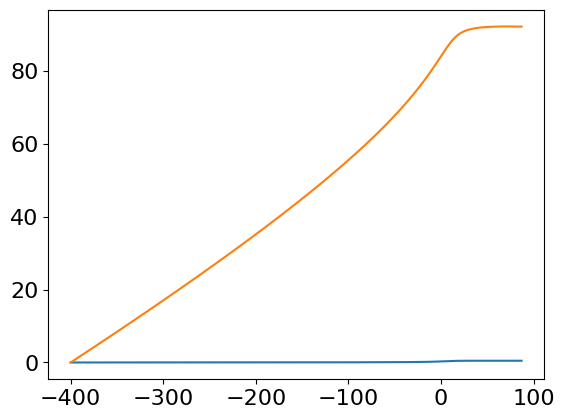

In [40]:
# plt.plot(times, freq)
plt.plot(df['x'], IUS(df['x'], d_freq).antiderivative()(df['x']))
plt.plot(df['x'], IUS(df['x'], model.eval(result.params, x=df['x'])).antiderivative()(df['x']))



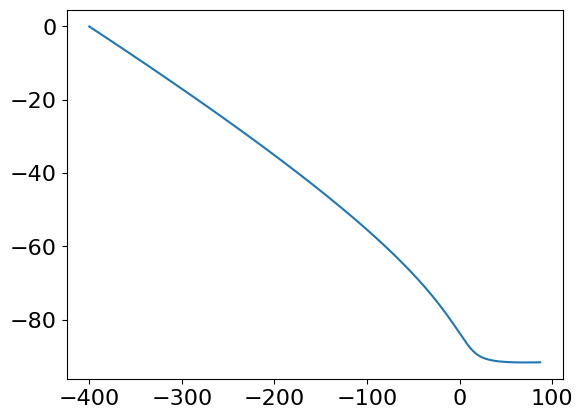

In [41]:
plt.plot(df['x'], IUS(df['x'], d_freq).antiderivative()(df['x'])-IUS(df['x'], model.eval(result.params, x=df['x'])).antiderivative()(df['x']))

In [42]:
model_names = []
for name in dir(lmfit.models):
    if 'Model' in name:
        model_names.append(name)

In [43]:
model_names

['BreitWignerModel',
 'ComplexConstantModel',
 'ConstantModel',
 'DampedHarmonicOscillatorModel',
 'DampedOscillatorModel',
 'DoniachModel',
 'ExponentialGaussianModel',
 'ExponentialModel',
 'ExpressionModel',
 'Gaussian2dModel',
 'GaussianModel',
 'LinearModel',
 'LognormalModel',
 'LorentzianModel',
 'Model',
 'MoffatModel',
 'ParabolicModel',
 'Pearson4Model',
 'Pearson7Model',
 'PolynomialModel',
 'PowerLawModel',
 'PseudoVoigtModel',
 'QuadraticModel',
 'RectangleModel',
 'SineModel',
 'SkewedGaussianModel',
 'SkewedVoigtModel',
 'SplineModel',
 'SplitLorentzianModel',
 'StepModel',
 'StudentsTModel',
 'ThermalDistributionModel',
 'VoigtModel']

In [44]:
# df['x'] = (df['x'] - df['x'][0]) + 1

BreitWignerModel


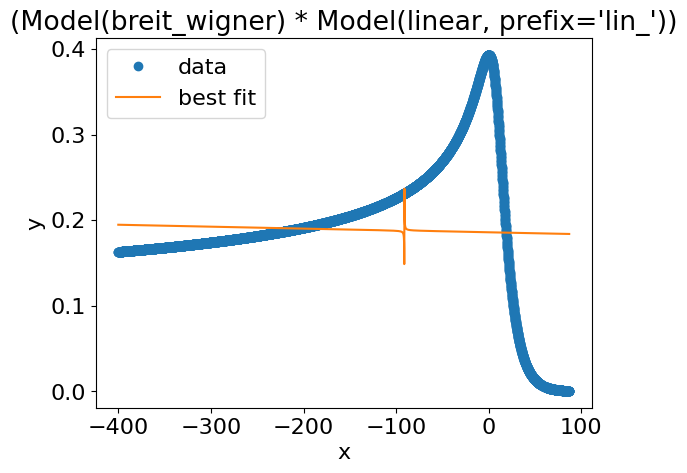

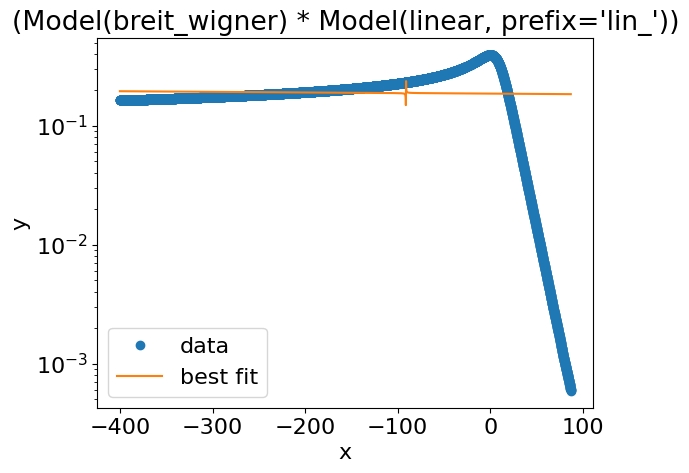

ComplexConstantModel


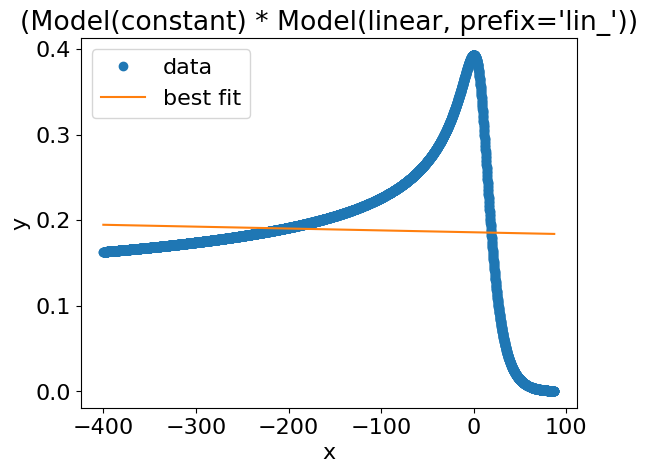

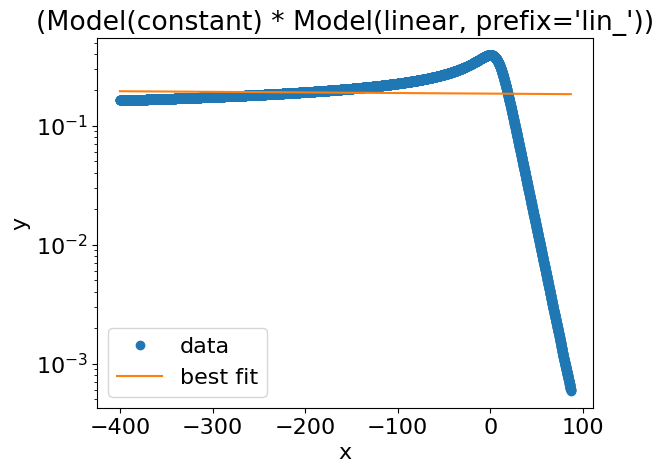

ConstantModel


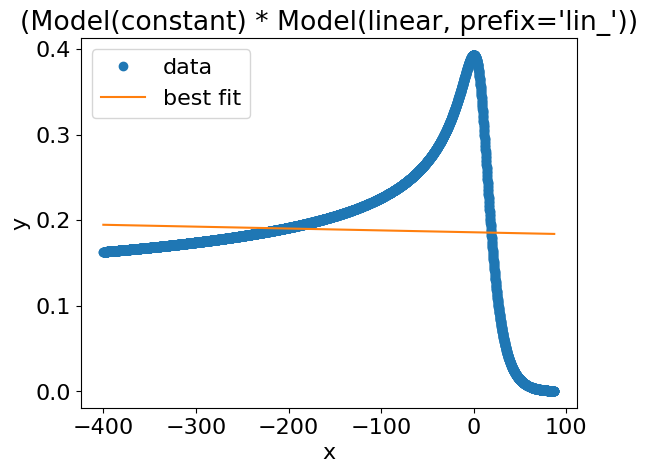

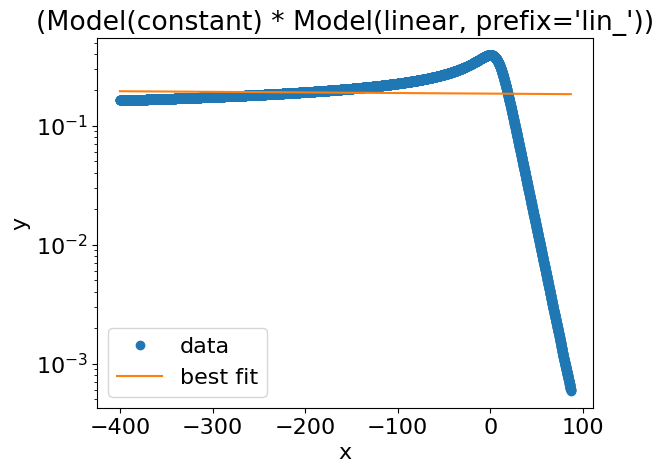

DampedHarmonicOscillatorModel


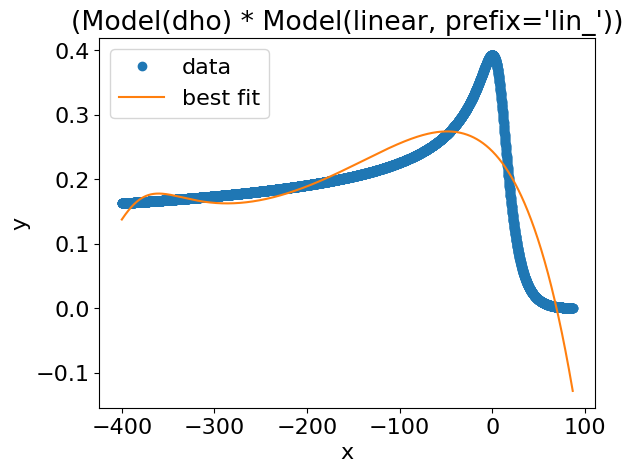

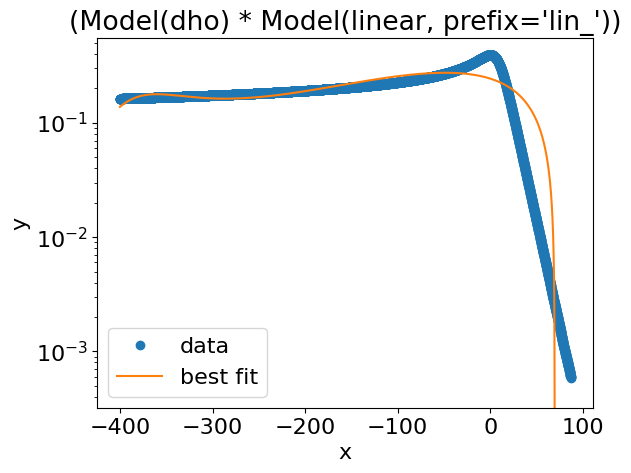

DampedOscillatorModel


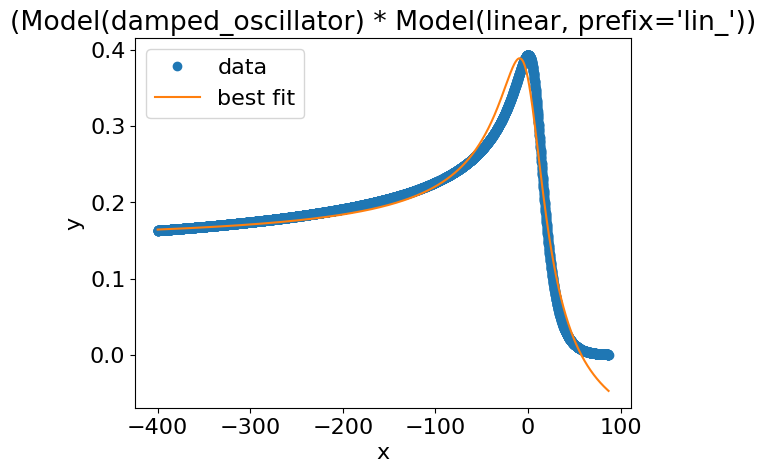

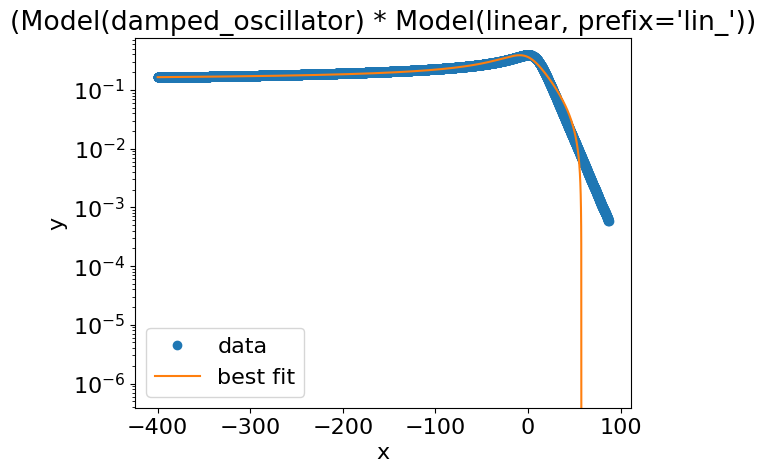

DoniachModel


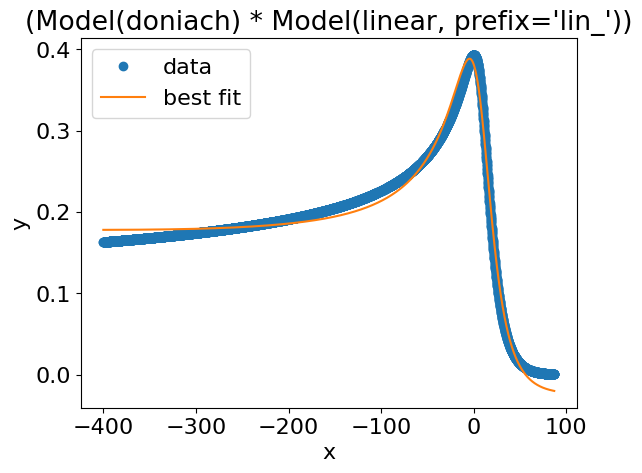

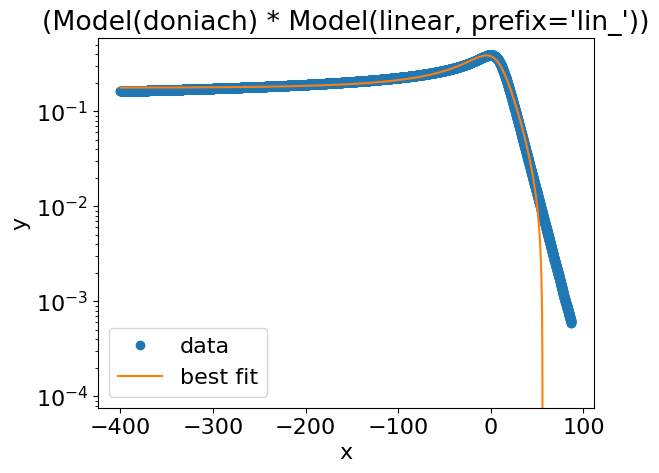

ExponentialGaussianModel
ExponentialModel


/opt/homebrew/Caskroom/miniforge/base/envs/sindy/lib/python3.9/site-packages/lmfit/lineshapes.py:293: RuntimeWarning: overflow encountered in exp
  return amplitude*(gamma/2) * exp(arg1) * erfc(arg2)
/opt/homebrew/Caskroom/miniforge/base/envs/sindy/lib/python3.9/site-packages/lmfit/lineshapes.py:293: RuntimeWarning: invalid value encountered in multiply
  return amplitude*(gamma/2) * exp(arg1) * erfc(arg2)


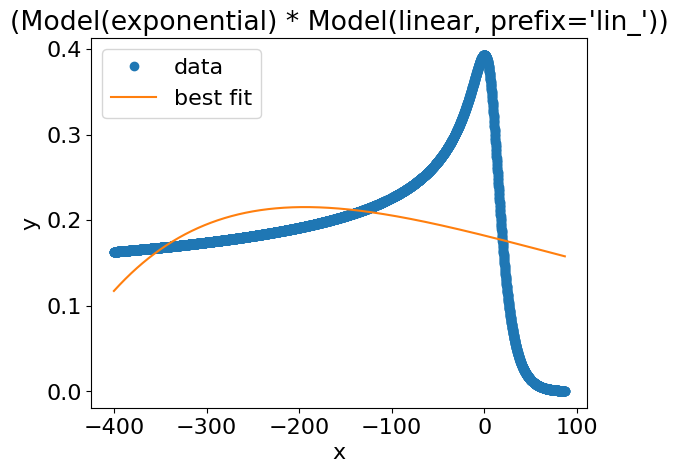

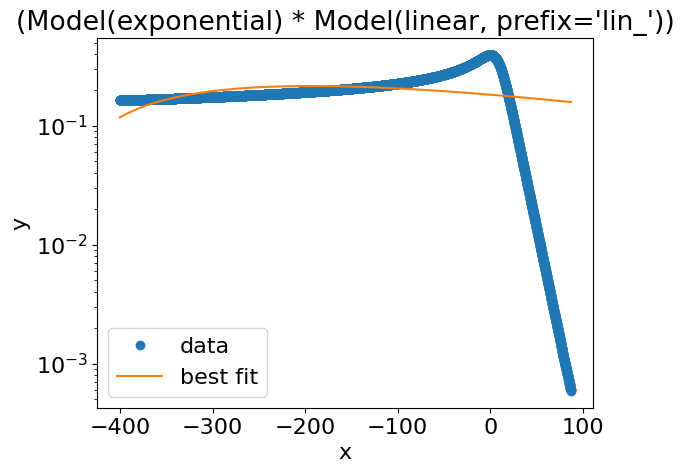

ExpressionModel
Gaussian2dModel
GaussianModel


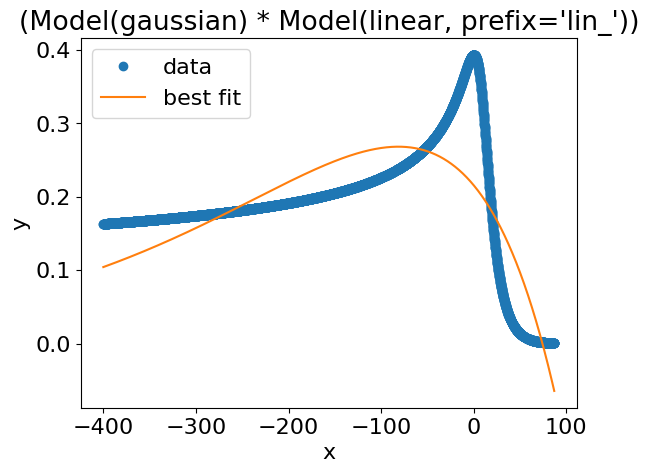

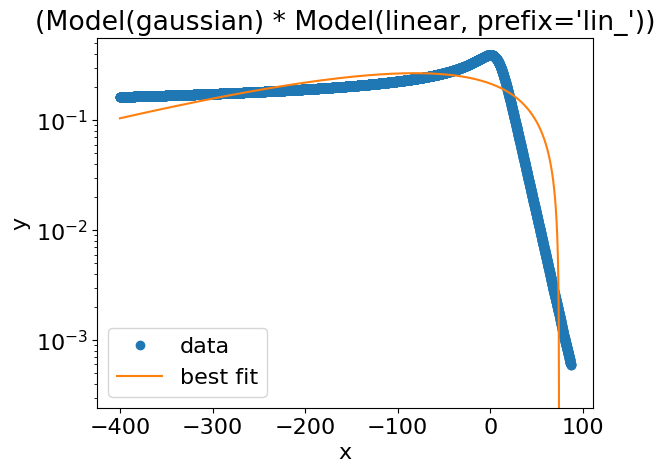

LinearModel


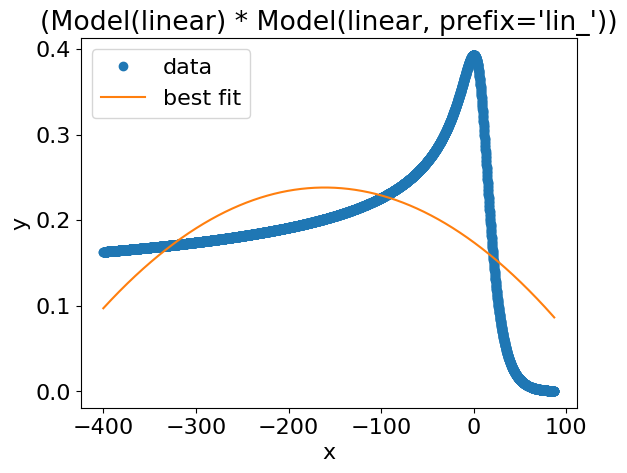

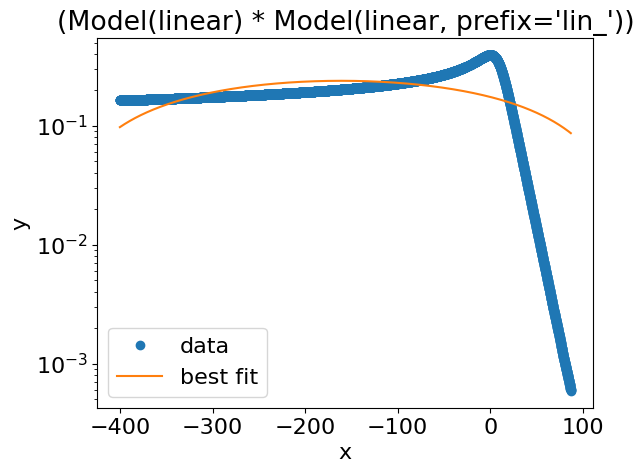

LognormalModel


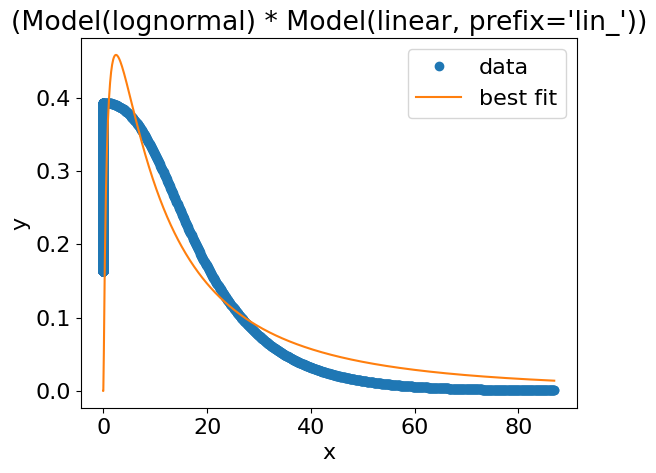

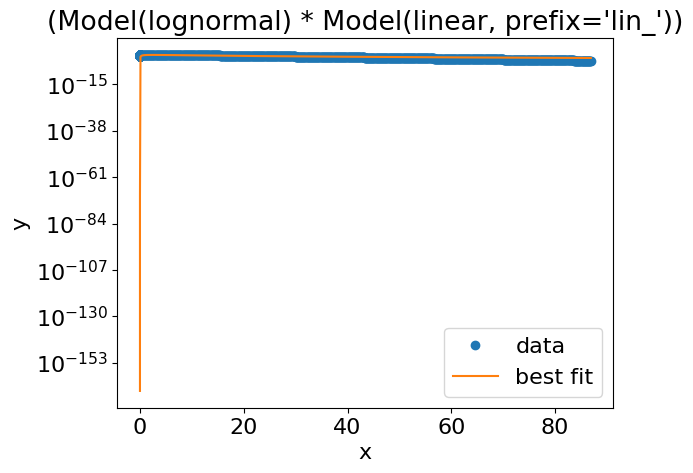

LorentzianModel


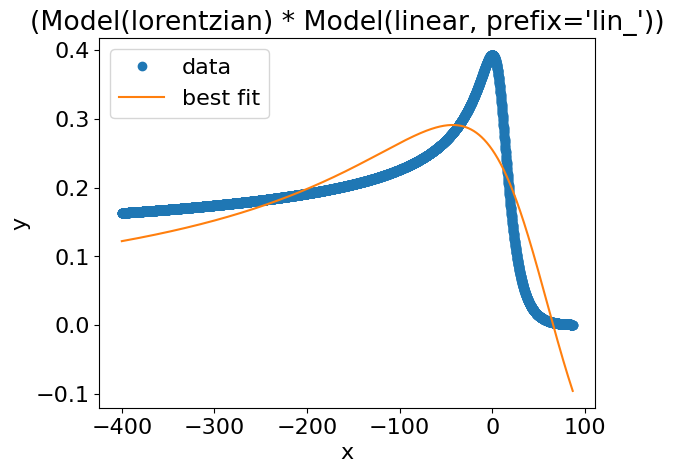

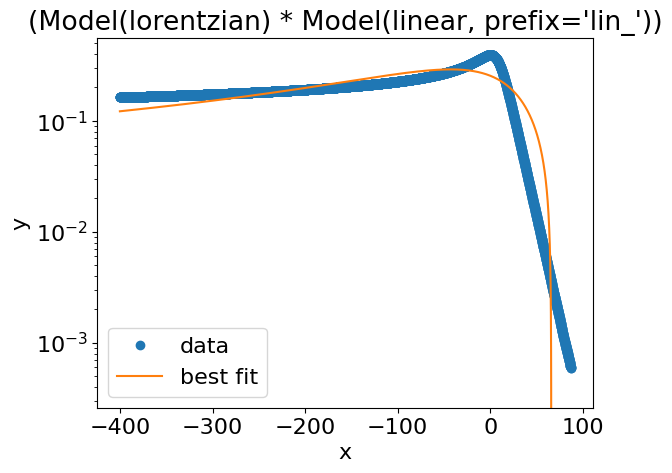

Model
MoffatModel


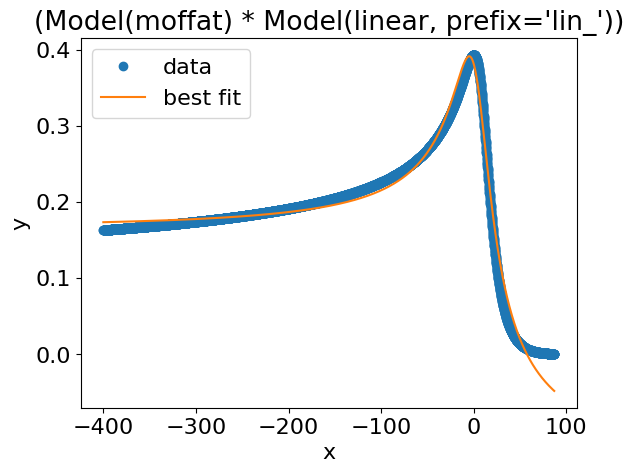

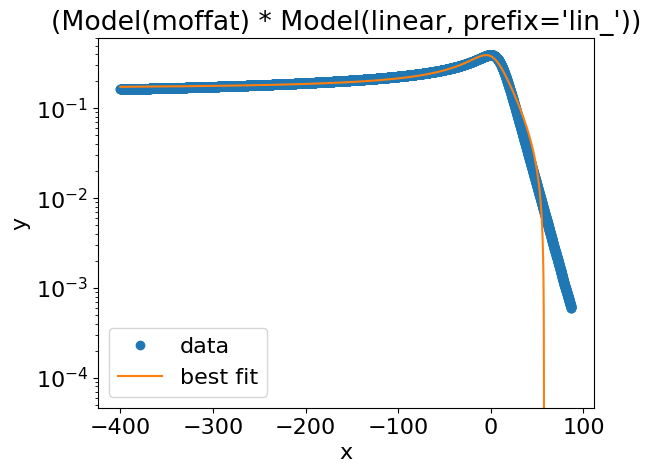

ParabolicModel


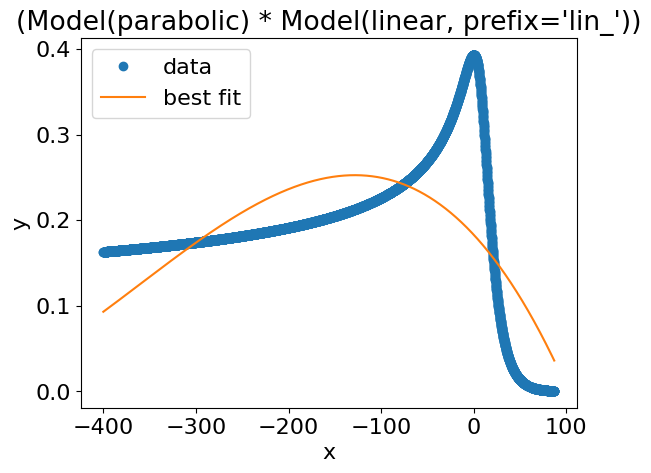

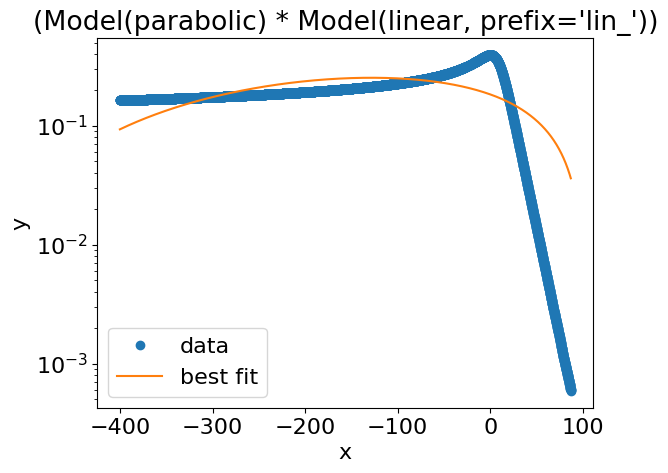

Pearson4Model


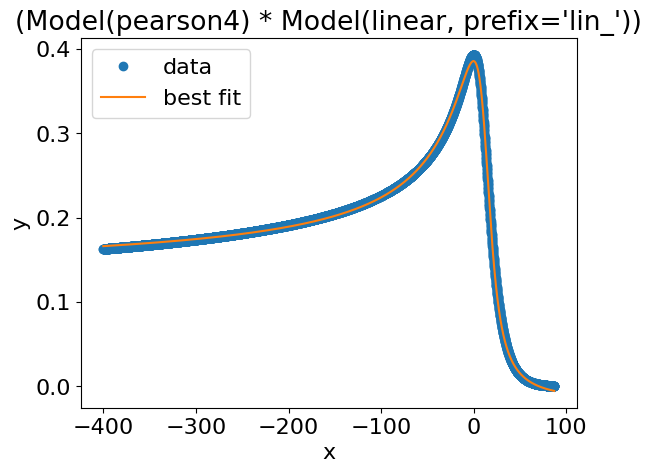

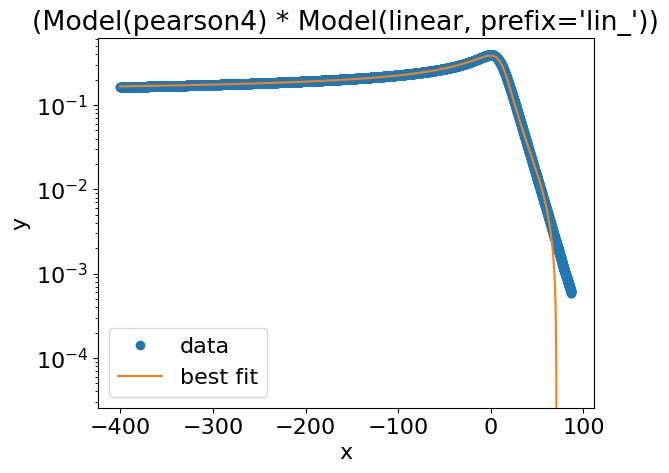

Pearson7Model


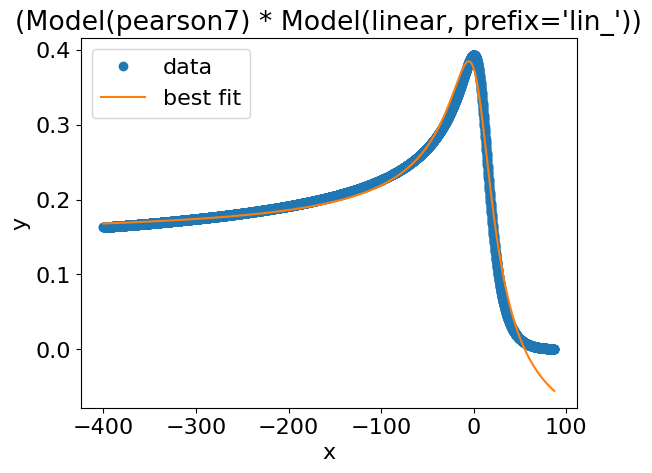

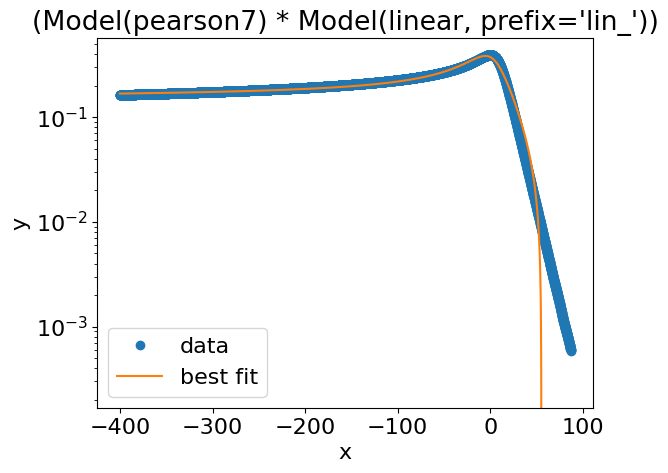

PolynomialModel


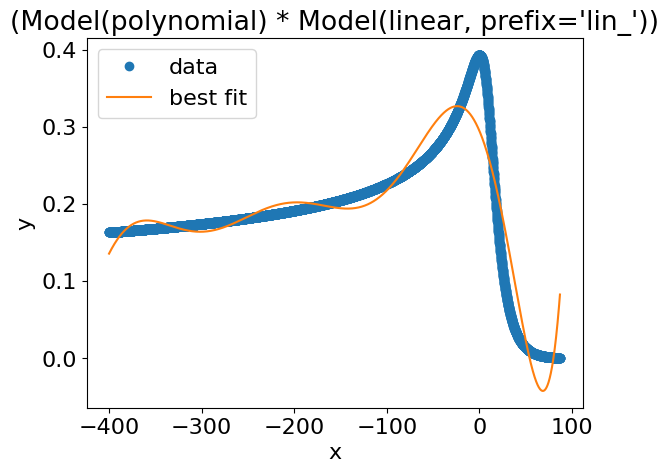

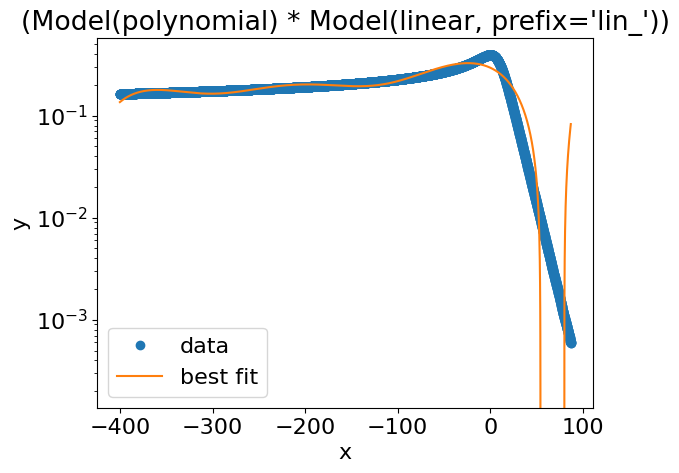

PowerLawModel
PseudoVoigtModel


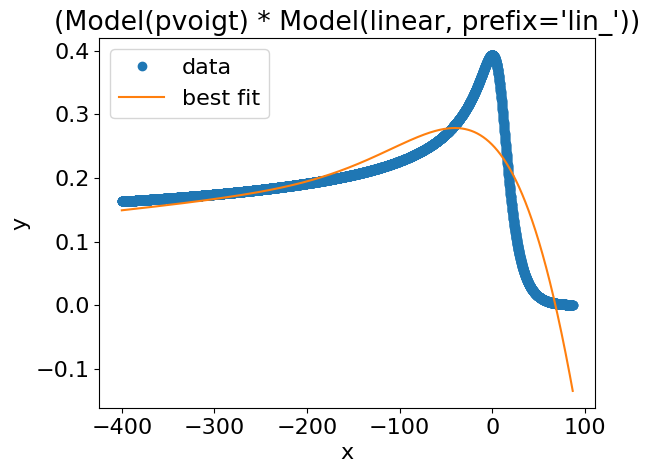

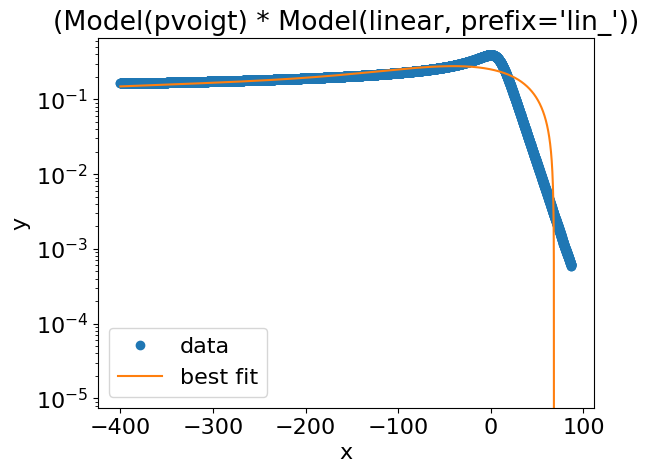

QuadraticModel


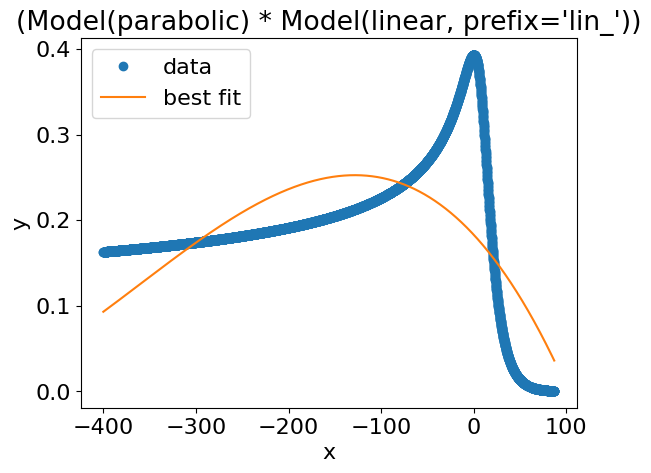

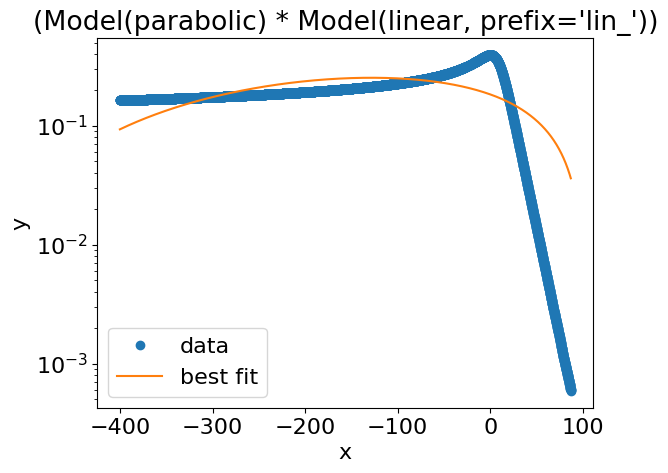

RectangleModel


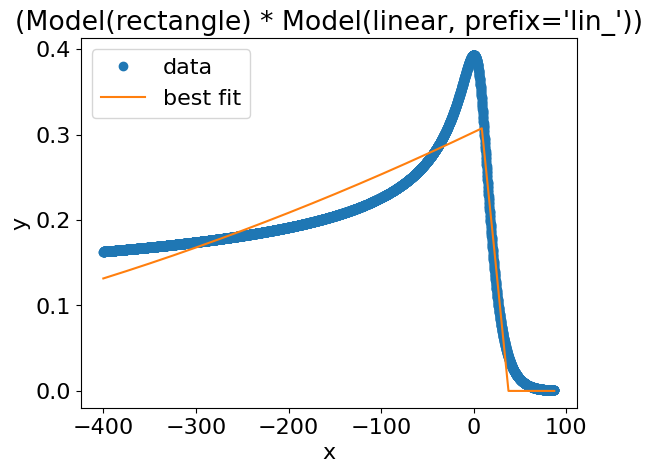

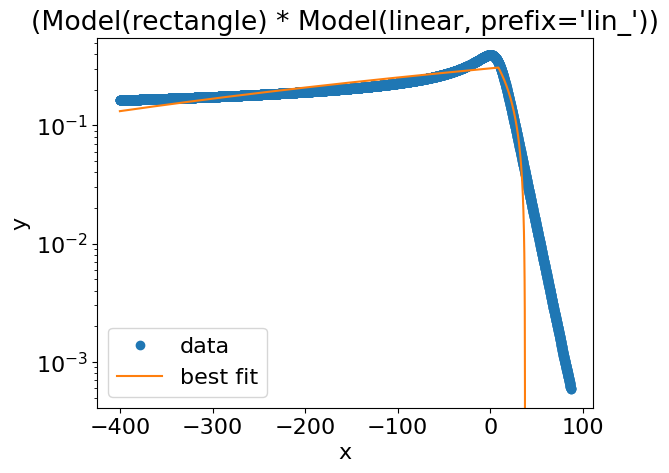

SineModel
SkewedGaussianModel


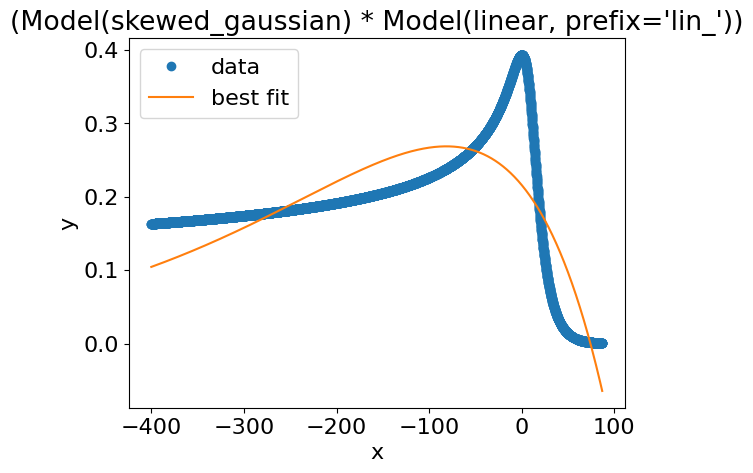

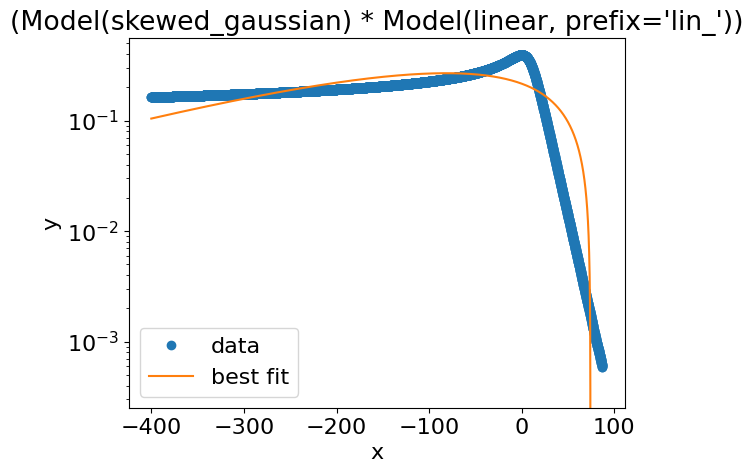

SkewedVoigtModel


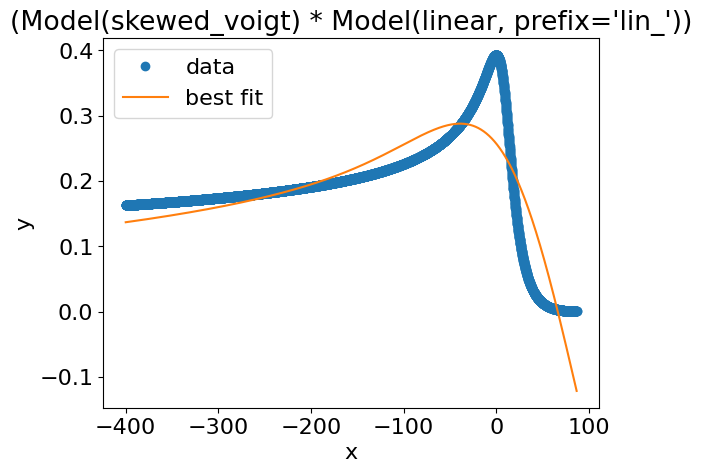

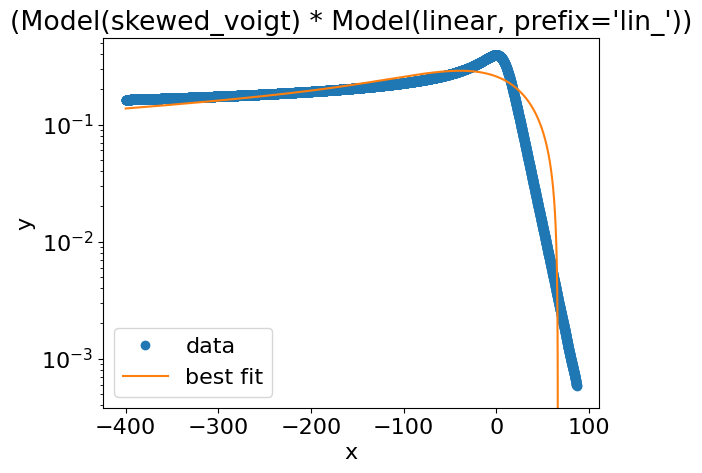

SplineModel
SplitLorentzianModel


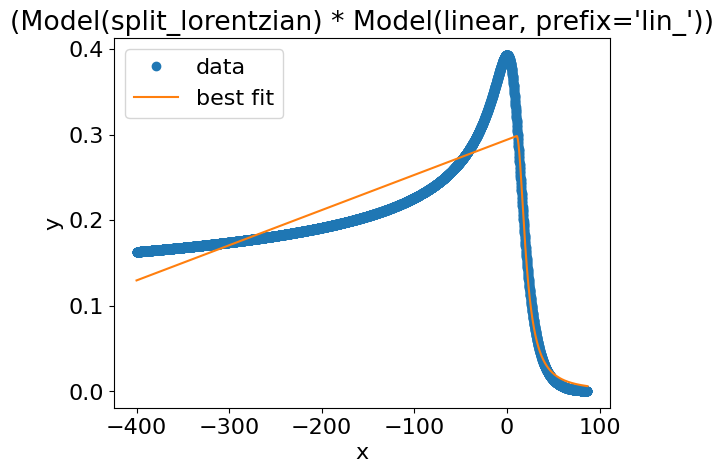

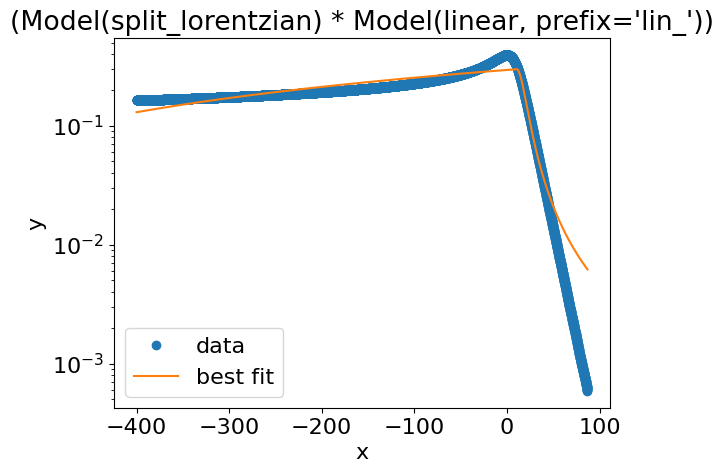

StepModel


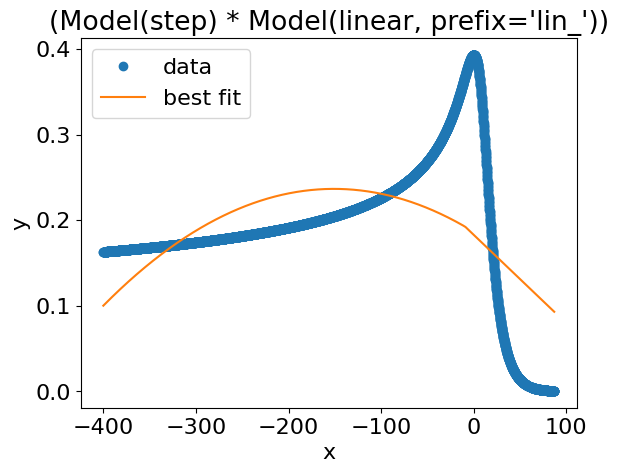

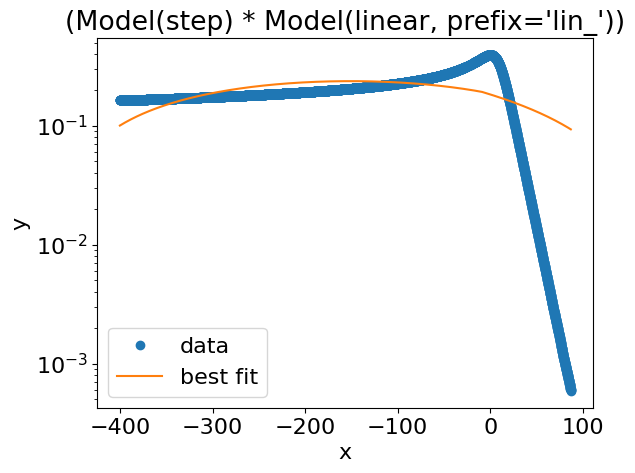

StudentsTModel


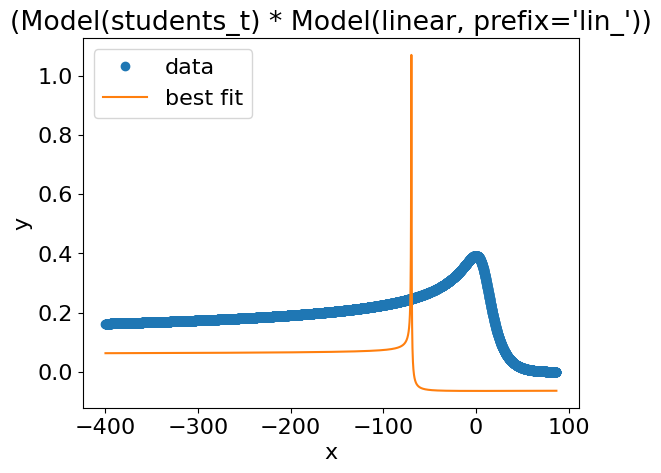

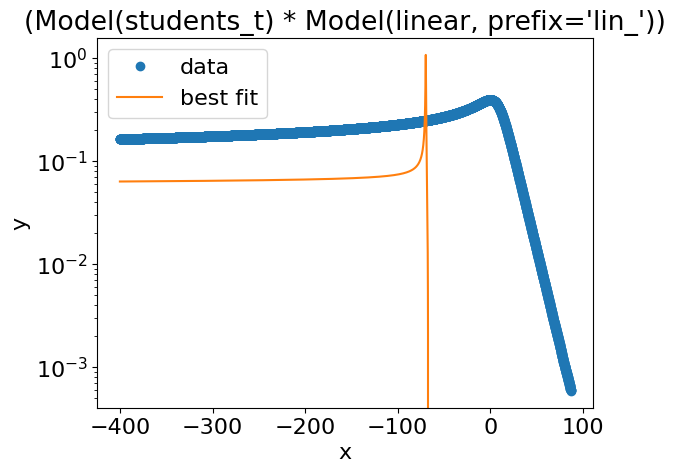

ThermalDistributionModel


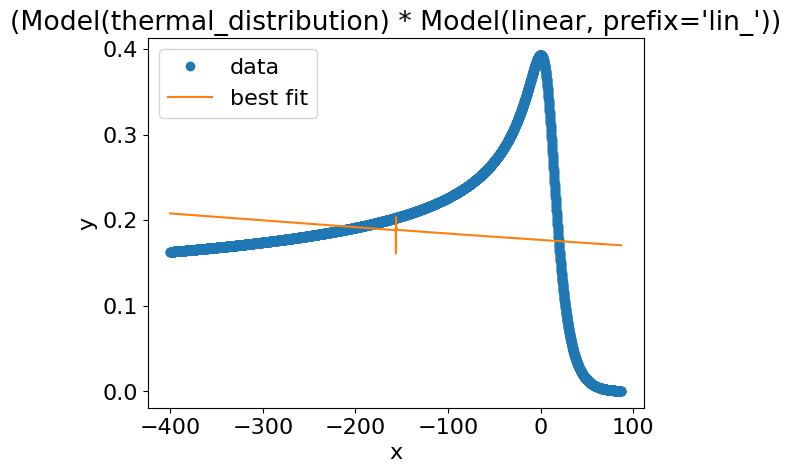

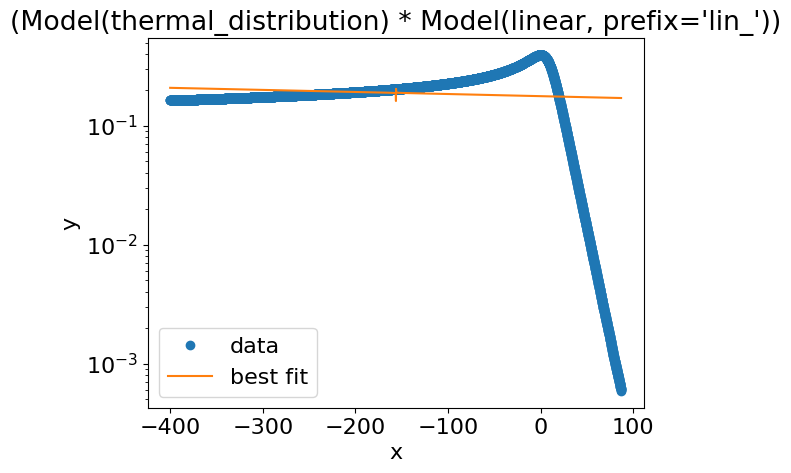

VoigtModel


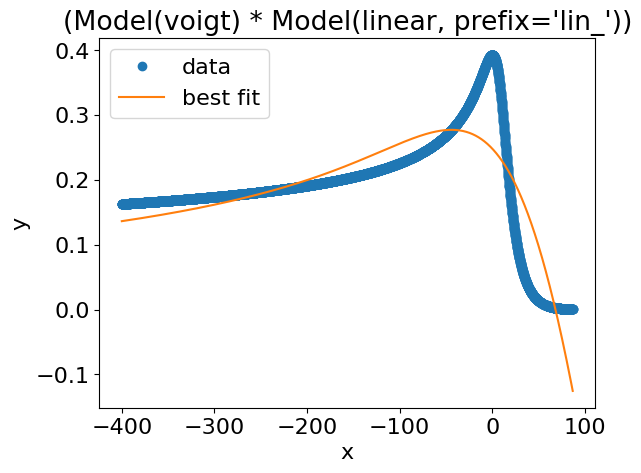

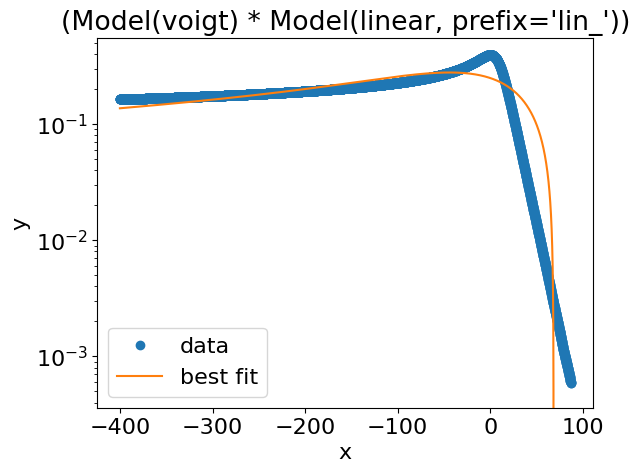

In [45]:
models={}
for model_name in model_names:
    try:
        print(model_name)
        # model = getattr(lmfit.models, model_name)()
        # params = model.guess(df['y'], x=df['x'])


        model_p = getattr(lmfit.models, model_name)()
        model_pol = lmfit.models.LinearModel(prefix='lin_')
        # model_pol = lmfit.models.QuadraticModel(prefix='lin_')
        # model_pol = lmfit.models.ExponentialModel(prefix='lin_')
        
        model = model_p * model_pol 
        # model = model_p + model_pol 
        
        params_p = model_p.guess(df['y'], x=df['x'])
        # params_pol = model_pol.make_params()
        params_pol = model_pol.guess(df['y'], x=df['x'])
        params = params_p + params_pol

        
        result = model.fit(df['y'], params, x=df['x'])
        # print(result.fit_report())
        result.plot_fit()
        plt.show()
        plt.close()
        result.plot_fit()
        plt.yscale('log')
        plt.show()
        plt.close()
    except:
        pass

# try to include exponential ringdown behaviour

In [46]:
# df = pd.DataFrame({'x':times, 'y':d_freq})
# df = pd.DataFrame({'x':times, 'y':amp})
# df = pd.DataFrame({'x':times, 'y':np.abs(d_strain)})
df = pd.DataFrame({'x':times, 'y':np.abs(dd_strain)})

<Axes: xlabel='x'>

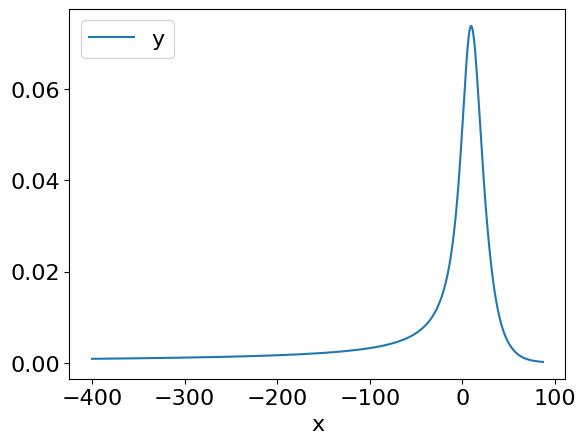

In [47]:
df.set_index('x').plot()

In [48]:
# try exp gaussian
# https://stackoverflow.com/questions/54197603/the-use-of-lmfit-exponentialgaussianmodel

In [49]:
# doesn't work, see link above?
# model = lmfit.models.ExponentialGaussianModel()
# params = model.guess(df['y'], x=df['x'])
# # params
# result = model.fit(df['y'], params, x=df['x'])

# print(result.fit_report())
# result.plot_fit()

In [50]:
from scipy.special import erfc
def expgaussian(x, amplitude=1, center=0, sigma=1.0, gamma=1.0):
    """ an alternative exponentially modified Gaussian."""
    dx = center-x
    return amplitude* np.exp(gamma*dx) * erfc( dx/(np.sqrt(2)*sigma))

In [51]:
model =  lmfit.Model(expgaussian)
pars = model.make_params(sigma=20, gamma=0.1, amplitude=2, center=0)

result  = model.fit(df['y'], pars, x=df['x'])

In [52]:
print(result.fit_report())

[[Model]]
    Model(expgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 4870
    # variables        = 4
    chi-square         = 0.04594623
    reduced chi-square = 9.4423e-06
    Akaike info crit   = -56343.4166
    Bayesian info crit = -56317.4532
    R-squared          = 0.95453165
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  8.7413e-21 (init = 2)
    center:     153.286848 (init = 0)
    sigma:      15.2139466 (init = 20)
    gamma:      0.63027507 (init = 0.1)


<Axes: title={'center': 'Model(expgaussian)'}, xlabel='x', ylabel='y'>

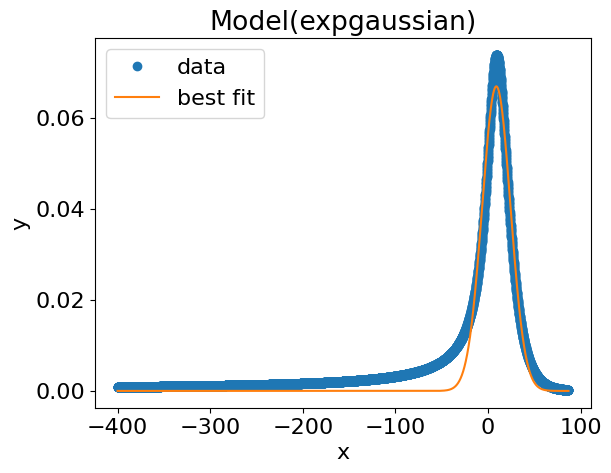

In [53]:
result.plot_fit()

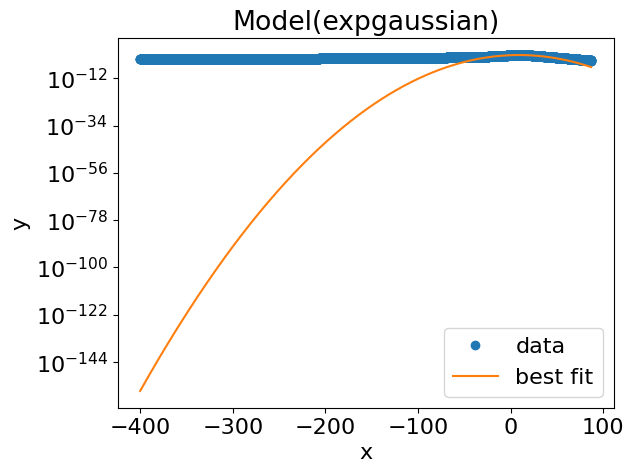

In [54]:
result.plot_fit()
plt.yscale('log')

In [55]:
# mask = (times >= 0) & (times < 50)
mask = (times >= -400) & (times < 10)
df = pd.DataFrame({'x':times[mask], 'y':amp[mask]})
# df = pd.DataFrame({'x':times[mask], 'y':np.abs(dd_strain[mask])})

<Axes: xlabel='x'>

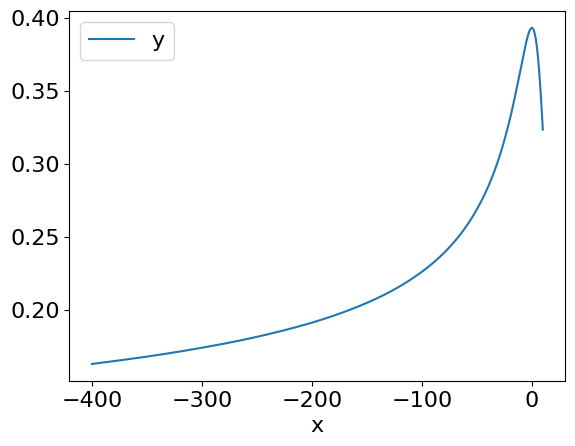

In [56]:
df.set_index('x').plot()

In [57]:
df.shape

(4100, 2)

[[Model]]
    Model(pearson4)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12000
    # data points      = 4100
    # variables        = 5
    chi-square         = 1.39689223
    reduced chi-square = 3.4112e-04
    Akaike info crit   = -32726.4185
    Bayesian info crit = -32694.8248
    R-squared          = 0.89308580
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  3111.13921 (init = 18.46382)
    center:     286.314914 (init = -16.85)
    sigma:      0.92005254 (init = 26.75)
    expon:      0.51768604 (init = 1.5)
    skew:       11.8893830 (init = 0)
    fwhm:       41.1636397 == 'sigma*sqrt(2**(1/expon)-1)*pi/arctan2(exp(1)*expon, skew)'
    height:     3.77072236 == '(amplitude / sigma) * exp(2 * (real(loggammafcn(expon + skew * 0.5j)) - loggammafcn(expon)) - betalnfnc(expon-0.5, 0.5) - expon * log1p(square(skew/(2*expon))) - skew * arctan(-skew/(2*expon)))'
    position:   275.749768 == 'center-sigma*skew/(2*expon)'

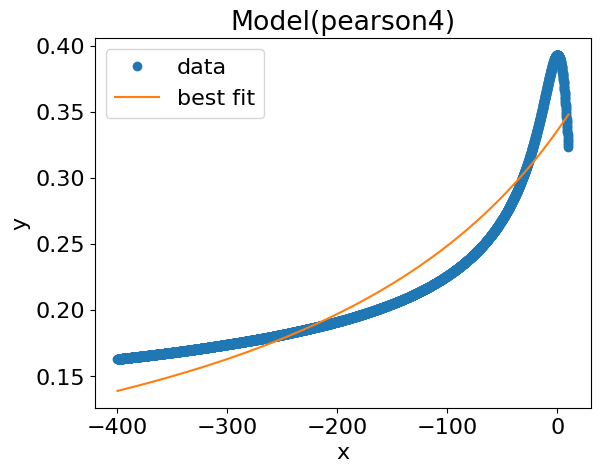

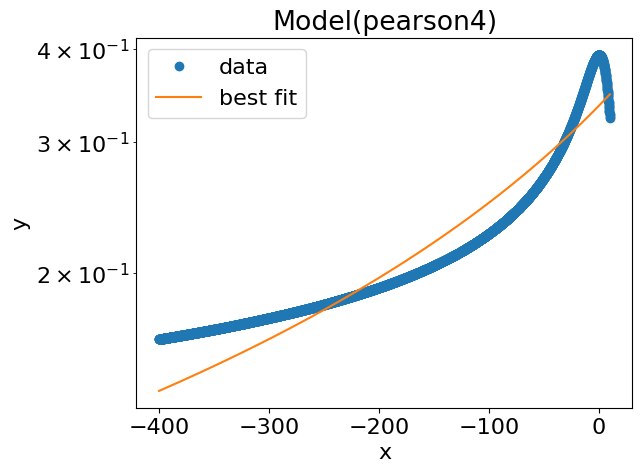

In [58]:
model = lmfit.models.Pearson4Model()
params = model.guess(df['y'], x=df['x'])
# params
result = model.fit(df['y'], params, x=df['x'])

print(result.fit_report())
result.plot_fit()
plt.show()
plt.close()
result.plot_fit()
plt.yscale('log')
plt.show()
plt.close()

[[Model]]
    (Model(pearson4, prefix='p_') * Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 201
    # data points      = 4100
    # variables        = 7
    chi-square         = 9.0276e-04
    reduced chi-square = 2.2056e-07
    Akaike info crit   = -62834.0789
    Bayesian info crit = -62789.8477
    R-squared          = 0.99993091
[[Variables]]
    p_amplitude:    65.4702751 +/- 1.5229e+08 (232615370.15%) (init = 18.46382)
    p_center:       11.5890259 +/- 0.03814950 (0.33%) (init = -16.85)
    p_sigma:        14.1214300 +/- 0.30389285 (2.15%) (init = 26.75)
    p_expon:        0.59656467 +/- 2.7270e-04 (0.05%) (init = 1.5)
    p_skew:        -0.00560395 +/- 0.06395197 (1141.19%) (init = 0)
    p_fwhm:         41.7608901 +/- 0.17316561 (0.41%) == 'p_sigma*sqrt(2**(1/p_expon)-1)*pi/arctan2(exp(1)*p_expon, p_skew)'
    p_height:       0.39690271 +/- 923256.716 (232615370.82%) == '(p_amplitude / p_sigma) * exp(2 * (real(logga

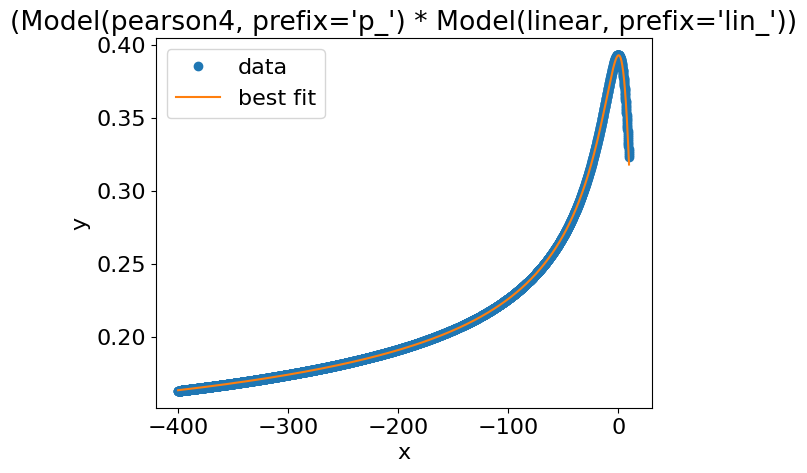

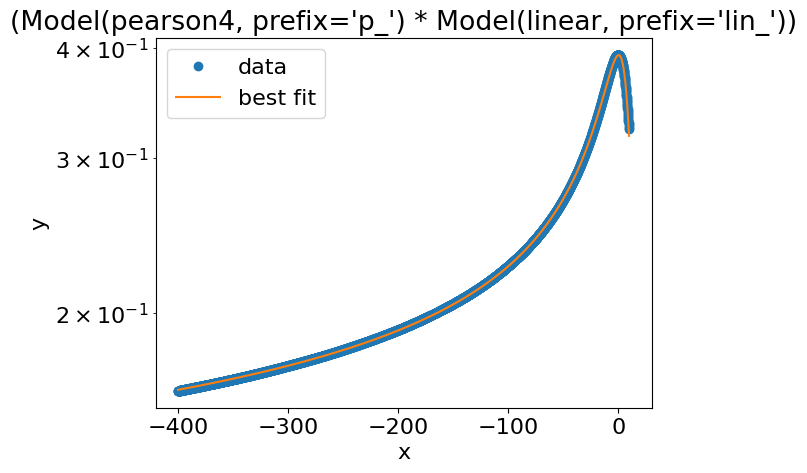

In [59]:
model_1 = lmfit.models.Pearson4Model(prefix='p_')
# model_1 = lmfit.models.Pearson7Model(prefix='p_')
params_1 = model_1.guess(df['y'], x=df['x'])

# model_2 = lmfit.models.ExponentialModel(prefix='exp_')
# params_2 = model_2.guess(df['y'], x=df['x'])

# model_step = lmfit.models.StepModel(form='erf', prefix='step')
# params_step = model_step.guess(df['y'], x=df['x'], center=30)

# model_constant = lmfit.models.ConstantModel()
# parms_cont = model_constant.make_params(c=1)

model_linear = lmfit.models.LinearModel(prefix='lin_')
# model_linear = lmfit.models.PolynomialModel(prefix='lin_', degree=1)
# df_masked = df.query("x < 0")
# params_linear = model_linear.guess(df_masked['y'], x=df_masked['x'])
params_linear = model_linear.guess(df['y'], x=df['x'])

# params = params_1
# model = model_1

# params = params_1 + params_2 + params_step + parms_cont
# model = model_1 + model_2 * model_step
# model = model_1 + model_2 * model_step
# model = model_1 * (model_constant + model_2 * model_step)

params = params_1 + params_linear
model = model_1 * model_linear

# # params
result = model.fit(df['y'], params, x=df['x'])

print(result.fit_report())
result.plot_fit()
plt.show()
plt.close()
result.plot_fit()
plt.yscale('log')
plt.show()
plt.close()

# try the ansatz that everyone else uses?

Damour, Nagar: https://arxiv.org/abs/1406.0401

Estelles+: https://arxiv.org/abs/2004.08302

Estelles+: https://arxiv.org/abs/2012.11923

In [208]:
times

array([-400. , -399.9, -399.8, ...,   86.7,   86.8,   86.9])

In [209]:
strain

array([ 1.00162770e-01-0.12867041j,  1.01105605e-01-0.12794282j,
        1.02043235e-01-0.12720826j, ...,  4.56468008e-05+0.00059891j,
        1.27967223e-05+0.00059453j, -1.94836595e-05+0.00058838j])

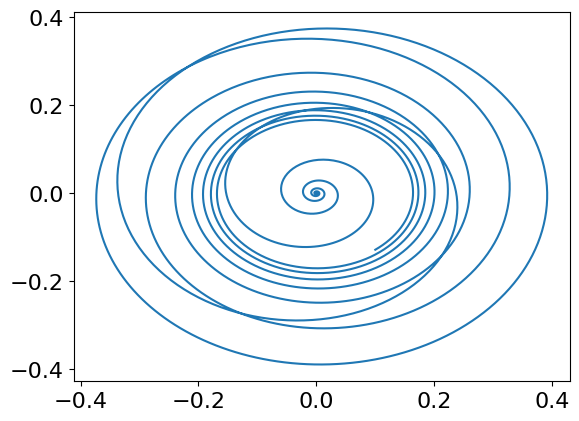

In [210]:
plt.figure()
plt.plot(strain.real, strain.imag)

In [459]:
mask = (times >= 0) & (times <= 60)
t = times[mask]
s = strain[mask]

In [460]:
x=t
y=s.real

In [484]:


def resid(params, x, ydata):
    decay = params['decay'].value
    offset = params['offset'].value
    omega = params['omega'].value
    amp = params['amp'].value

    y_model = offset + amp * np.sin(x*omega) * np.exp(-x/decay)
    return y_model - ydata
decay = 5
offset = 1.0
amp = 2.0
omega = 4.0

np.random.seed(2)
# x = np.linspace(0, 10, 101)
# y = offset + amp*np.sin(omega*x) * np.exp(-x/decay)
# yn = y + np.random.normal(size=y.size, scale=0.450)

params = lmfit.Parameters()
params.add('offset', 2.0, min=0, max=10.0)
params.add('omega', 3.3, min=0, max=10.0)
params.add('amp', 2.5, min=0, max=10.0)
params.add('decay', 1.0, min=0, max=100.0)
# params.add('decay', 11, min=0, max=100.0, vary=False)
o1 = lmfit.minimize(resid, params, args=(x, y), method='leastsq')
print("# Fit using leastsq:")
lmfit.report_fit(o1)

# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 136
    # data points      = 600
    # variables        = 4
    chi-square         = 1.48982702
    reduced chi-square = 0.00249971
    Akaike info crit   = -3590.96178
    Bayesian info crit = -3573.37406
[[Variables]]
    offset:  4.7294e-11 +/- 0.00179230 (3789676751.94%) (init = 2)
    omega:   0.52398192 +/- 0.00129379 (0.25%) (init = 3.3)
    amp:     0.49641075 +/- 0.01137875 (2.29%) (init = 2.5)
    decay:   17.1004812 +/- 0.55511769 (3.25%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, decay)    = -0.7323
    C(offset, amp)   = +0.1817
    C(offset, decay) = -0.1423


In [485]:
o1.params

Parameters([('offset', <Parameter 'offset', value=4.7294390626007043e-11 +/- 0.00179, bounds=[0:10.0]>), ('omega', <Parameter 'omega', value=0.5239819166537651 +/- 0.00129, bounds=[0:10.0]>), ('amp', <Parameter 'amp', value=0.49641075123268985 +/- 0.0114, bounds=[0:10.0]>), ('decay', <Parameter 'decay', value=17.100481240379988 +/- 0.555, bounds=[0:100.0]>)])

In [486]:
o1.params['decay'].value

17.100481240379988

In [487]:
1/(f_damp*2*np.pi)

11.706422641558213

In [488]:
cmplx_omega

(0.5255579975938124-0.09090909090909091j)

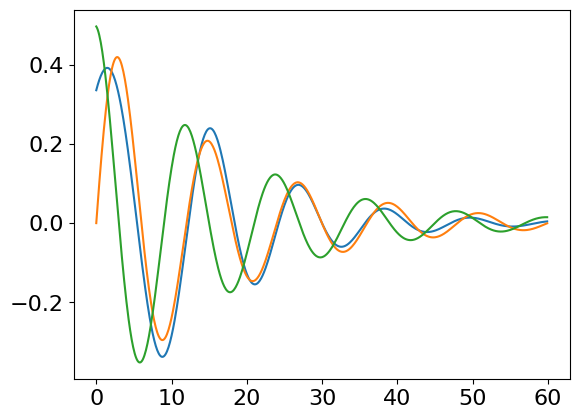

In [489]:
plt.plot(x, y)
plt.plot(x, o1.params['offset'].value + o1.params['amp'].value * np.sin(x*o1.params['omega'].value) * np.exp(-x/o1.params['decay'].value))

cmplx_omega = o1.params['omega'].value - 1.j*1/o1.params['decay'].value

plt.plot(x, np.real(o1.params['amp'].value * np.exp(-1.j * cmplx_omega*x)))

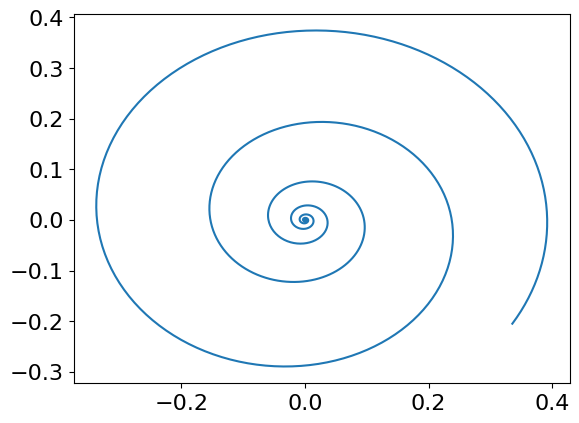

In [212]:
plt.figure()
plt.plot(s.real, s.imag)

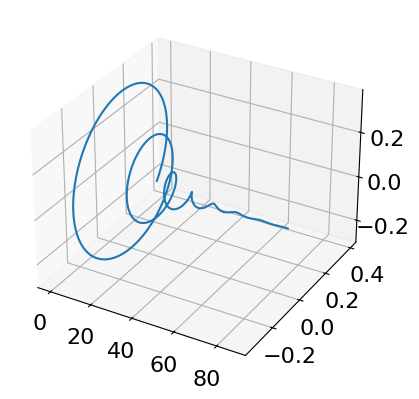

In [213]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(t, s.real, s.imag)

In [214]:
f_ring

0.0880868782728524

In [215]:
f_damp

0.0135955234118141

0.553466179319303

11.706422641558213

In [578]:
sigma = (f_ring) + 1.j * (f_damp)
sigma

(0.0880868782728524+0.0135955234118141j)

In [579]:
# cmplx_omega

In [580]:
# sigma=cmplx_omega

In [581]:
phi0 = np.unwrap(np.angle(s))[0]
phi0

-0.5484079038065444

In [584]:
h_fund = np.exp(-sigma*t + 1.j*phi0)
h_bar = h_fund * s
# h_fund = h_fund * s

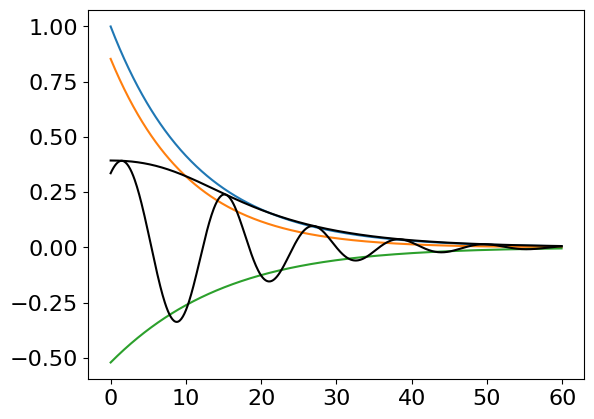

In [585]:
plt.plot(t, np.abs(h_fund))
plt.plot(t, np.real(h_fund))
plt.plot(t, np.imag(h_fund))

plt.plot(t, np.abs(s), c='k')
plt.plot(t, s.real, c='k')

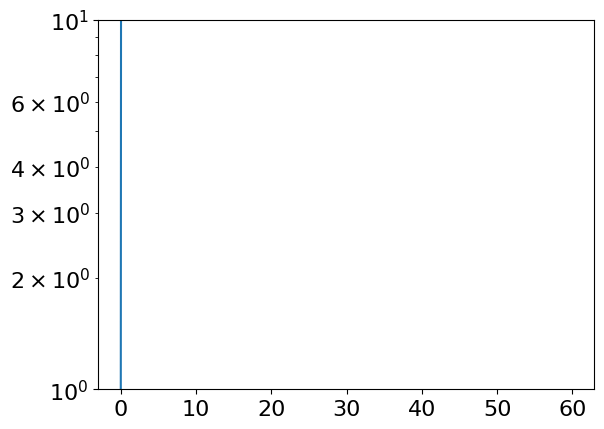

In [551]:
plt.plot(t, np.abs(h_fund))
plt.plot(t, np.abs(s), c='k')

plt.yscale('log')

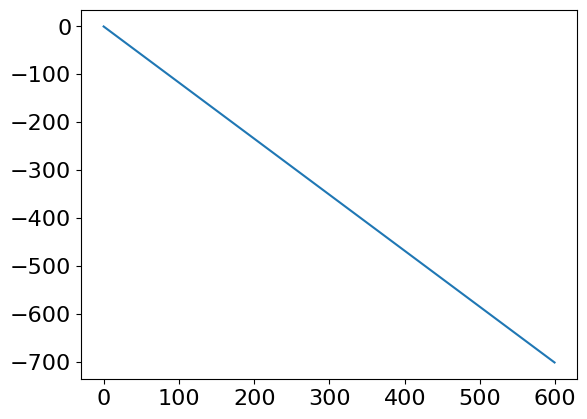

In [449]:
plt.plot(np.unwrap(np.angle(h_fund)))

# maybe use Pearson4 for the ramp up?